In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from datetime import datetime

In [5]:
#Load the datasets

matches = pd.read_csv(r"C:\Users\Sunil Kannur\OneDrive\Desktop\Unified Mentors\UM_Project\FIFA WC data\WorldCupMatches.csv")
players = pd.read_csv(r"C:\Users\Sunil Kannur\OneDrive\Desktop\Unified Mentors\UM_Project\FIFA WC data\WorldCupPlayers.csv")
worldcups = pd.read_csv(r"C:\Users\Sunil Kannur\OneDrive\Desktop\Unified Mentors\UM_Project\FIFA WC data\WorldCups.csv")


In [6]:
# Preview the data
print("World Cup Matches:\n", matches.head())
print("\nWorld Cup Players:\n", players.head())
print("\nWorld Cups:\n", worldcups.head())

World Cup Matches:
    Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  Attendance  Half-time Home Goals  Half-time Away Goals  \
0                     4444.0                     3            

In [7]:
# Inspect data
print("Matches Info:")
print(matches.info())
print("\nPlayers Info:")
print(players.info())
print("\nWorld Cups Info:")
print(worldcups.info())

Matches Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 836 entries, 0 to 835
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Year                  836 non-null    int64  
 1   Datetime              836 non-null    object 
 2   Stage                 836 non-null    object 
 3   Stadium               836 non-null    object 
 4   City                  836 non-null    object 
 5   Home Team Name        836 non-null    object 
 6   Home Team Goals       836 non-null    int64  
 7   Away Team Goals       836 non-null    int64  
 8   Away Team Name        836 non-null    object 
 9   Win conditions        836 non-null    object 
 10  Attendance            835 non-null    float64
 11  Half-time Home Goals  836 non-null    int64  
 12  Half-time Away Goals  836 non-null    int64  
 13  Referee               836 non-null    object 
 14  Assistant 1           836 non-null    object 
 15  Assistant

In [8]:
# Check for missing values
print("\nMissing Values in Matches:\n", matches.isnull().sum())
print("\nMissing Values in Players:\n", players.isnull().sum())
print("\nMissing Values in World Cups:\n", worldcups.isnull().sum())


Missing Values in Matches:
 Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              1
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

Missing Values in Players:
 RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33030
Event            28225
dtype: int64

Missing Values in World Cups:
 Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams   

In [9]:
# Summary statistics
print("Matches Summary Statistics:")
print(matches.describe())

Matches Summary Statistics:
              Year  Home Team Goals  Away Team Goals     Attendance  \
count   836.000000       836.000000       836.000000     835.000000   
mean   1984.535885         1.824163         1.021531   44859.457485   
std      22.299860         1.619178         1.072024   23551.107893   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   29800.000000   
50%    1990.000000         2.000000         1.000000   41000.000000   
75%    2002.000000         3.000000         2.000000   61009.000000   
max    2014.000000        10.000000         7.000000  173850.000000   

       Half-time Home Goals  Half-time Away Goals       RoundID       MatchID  
count            836.000000            836.000000  8.360000e+02  8.360000e+02  
mean               0.718900              0.427033  1.086093e+07  5.677577e+07  
std                0.941995              0.675091  2.751802e+07  1.070329e+08  
min         

In [10]:
# Unique values
print("\nUnique Years in World Cups:\n", worldcups['Year'].unique())
print("\nUnique Teams in Matches:\n", matches['Home Team Name'].unique())


Unique Years in World Cups:
 [1930 1934 1938 1950 1954 1958 1962 1966 1970 1974 1978 1982 1986 1990
 1994 1998 2002 2006 2010 2014]

Unique Teams in Matches:
 ['France' 'USA' 'Yugoslavia' 'Romania' 'Argentina' 'Chile' 'Uruguay'
 'Brazil' 'Paraguay' 'Austria' 'Hungary' 'Switzerland' 'Sweden' 'Germany'
 'Spain' 'Italy' 'Czechoslovakia' 'Cuba' 'England' 'Germany FR' 'Turkey'
 'Soviet Union' 'Northern Ireland' 'Mexico' 'Wales' 'Portugal' 'Korea DPR'
 'Peru' 'Belgium' 'Bulgaria' 'German DR' 'Zaire' 'Poland' 'Australia'
 'Scotland' 'Netherlands' 'Haiti' 'Tunisia' 'Algeria' 'Honduras' 'Canada'
 'Morocco' 'Korea Republic' 'Iraq' 'Denmark' 'rn">United Arab Emirates'
 'Costa Rica' 'Cameroon' 'rn">Republic of Ireland' 'Colombia' 'Norway'
 'Nigeria' 'Saudi Arabia' 'Bolivia' 'Russia' 'Greece' 'Jamaica'
 'South Africa' 'Japan' 'Croatia' 'China PR' 'Senegal' 'Slovenia'
 'Ecuador' 'rn">Trinidad and Tobago' 'rn">Serbia and Montenegro' 'Angola'
 'Czech Republic' 'Togo' 'Iran' "C�te d'Ivoire" 'Ghana' 'U

In [11]:
# Check for missing values
print(matches.isnull().sum())
print(players.isnull().sum())
print(worldcups.isnull().sum())

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              1
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33030
Event            28225
dtype: int64
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64


In [12]:
print(matches.columns)

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials'],
      dtype='object')


In [13]:
matches['Home Team Goals'].fillna(matches['Home Team Goals'].mean(), inplace=True)
matches['Away Team Goals'].fillna(matches['Away Team Goals'].mean(), inplace=True)

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_3912\2656044011.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['Home Team Goals'].fillna(matches['Home Team Goals'].mean(), inplace=True)
C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_3912\2656044011.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [14]:
matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']

In [15]:
matches['Total Goals'].fillna(matches['Total Goals'].mean(), inplace=True)

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_3912\3903014121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['Total Goals'].fillna(matches['Total Goals'].mean(), inplace=True)


In [16]:
print(matches.isnull().sum())

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              1
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
Total Goals             0
dtype: int64


In [17]:
print(players.isnull().sum())
print(worldcups.isnull().sum())

RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0
Player Name          0
Position         33030
Event            28225
dtype: int64
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64


In [18]:
matches['Home Team Name'].fillna(matches['Home Team Name'].mode()[0], inplace=True)


C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_3912\1713069843.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['Home Team Name'].fillna(matches['Home Team Name'].mode()[0], inplace=True)


In [19]:
matches.dropna(subset=['Home Team Name', 'Away Team Name'], inplace=True)


In [20]:
# Check for duplicates
print(matches.duplicated().sum())

# Remove duplicates
matches.drop_duplicates(inplace=True)


0


In [18]:
matches['Home Team Name'] = matches['Home Team Name'].str.strip().str.title()
matches['Away Team Name'] = matches['Away Team Name'].str.strip().str.title()


In [19]:
print(matches.columns)

Index(['Year', 'Datetime', 'Stage', 'Stadium', 'City', 'Home Team Name',
       'Home Team Goals', 'Away Team Goals', 'Away Team Name',
       'Win conditions', 'Attendance', 'Half-time Home Goals',
       'Half-time Away Goals', 'Referee', 'Assistant 1', 'Assistant 2',
       'RoundID', 'MatchID', 'Home Team Initials', 'Away Team Initials',
       'Total Goals'],
      dtype='object')


In [20]:
matches.columns = matches.columns.str.strip()

In [21]:
matches['Date'] = pd.to_datetime(matches['Year'], format='%Y')


In [22]:
matches.columns = matches.columns.str.strip()


In [23]:
print(matches.head())


   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            Usa                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  ...  Half-time Away Goals                 Referee  \
0                 ...                     0  LOMBARDI Domingo (URU)   
1               

In [24]:
print(matches.isnull().sum())


Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              1
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
Total Goals             0
Date                    0
dtype: int64


In [25]:
matches.drop_duplicates(inplace=True)


In [26]:
matches.rename(columns=lambda x: x.strip().replace(" ", "_").lower(), inplace=True)


In [27]:
print(matches.describe())


              year  home_team_goals  away_team_goals     attendance  \
count   836.000000       836.000000       836.000000     835.000000   
mean   1984.535885         1.824163         1.021531   44859.457485   
min    1930.000000         0.000000         0.000000    2000.000000   
25%    1970.000000         1.000000         0.000000   29800.000000   
50%    1990.000000         2.000000         1.000000   41000.000000   
75%    2002.000000         3.000000         2.000000   61009.000000   
max    2014.000000        10.000000         7.000000  173850.000000   
std      22.299860         1.619178         1.072024   23551.107893   

       half-time_home_goals  half-time_away_goals       roundid       matchid  \
count            836.000000            836.000000  8.360000e+02  8.360000e+02   
mean               0.718900              0.427033  1.086093e+07  5.677577e+07   
min                0.000000              0.000000  2.010000e+02  2.500000e+01   
25%                0.000000         

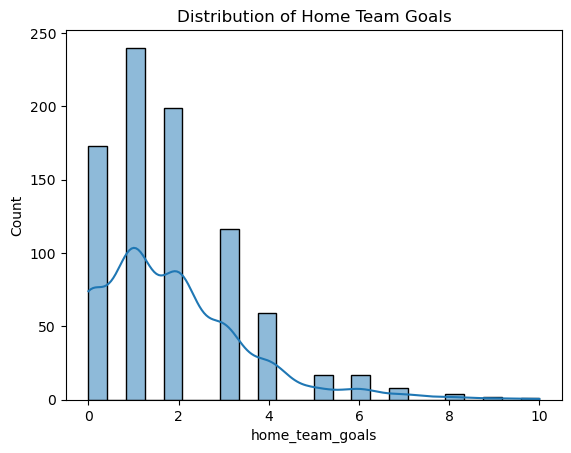

In [28]:
sns.histplot(matches['home_team_goals'], kde=True)
plt.title('Distribution of Home Team Goals')
plt.show()


In [29]:
numeric_matches = matches.select_dtypes(include=['number'])
print(numeric_matches.head())


   year  home_team_goals  away_team_goals  attendance  half-time_home_goals  \
0  1930                4                1      4444.0                     3   
1  1930                3                0     18346.0                     2   
2  1930                2                1     24059.0                     2   
3  1930                3                1      2549.0                     1   
4  1930                1                0     23409.0                     0   

   half-time_away_goals  roundid  matchid  total_goals  
0                     0      201     1096            5  
1                     0      201     1090            3  
2                     0      201     1093            3  
3                     0      201     1098            4  
4                     0      201     1085            1  


In [30]:
print(numeric_matches.corr())


                          year  home_team_goals  away_team_goals  attendance  \
year                  1.000000        -0.378353         0.077467    0.304310   
home_team_goals      -0.378353         1.000000         0.014603   -0.112661   
away_team_goals       0.077467         0.014603         1.000000   -0.029360   
attendance            0.304310        -0.112661        -0.029360    1.000000   
half-time_home_goals -0.280957         0.729966        -0.003487   -0.121797   
half-time_away_goals  0.019306        -0.004630         0.678989   -0.040929   
roundid               0.358752        -0.113795        -0.005205    0.074917   
matchid               0.621184        -0.187766         0.087074    0.143524   
total_goals          -0.270894         0.836271         0.560470   -0.109413   

                      half-time_home_goals  half-time_away_goals   roundid  \
year                             -0.280957              0.019306  0.358752   
home_team_goals                   0.729966 

In [31]:
matches['total_goals'] = matches['home_team_goals'] + matches['away_team_goals']


In [32]:
# Sum goals for home teams
home_goals = matches.groupby('home_team_name')['home_team_goals'].sum()

# Sum goals for away teams
away_goals = matches.groupby('away_team_name')['away_team_goals'].sum()

# Combine the results
total_goals = home_goals.add(away_goals, fill_value=0)

# Find the team with the most goals
top_team = total_goals.idxmax()
top_goals = total_goals.max()

print(f"The team that scored the most goals is {top_team} with {top_goals} goals.")


The team that scored the most goals is Brazil with 221.0 goals.


In [33]:
# Sort teams by total goals scored
sorted_teams = total_goals.sort_values(ascending=False)
print(sorted_teams.head())


Brazil        221.0
Argentina     131.0
Germany Fr    131.0
Italy         128.0
France        106.0
dtype: float64


C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_35116\1143866347.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')


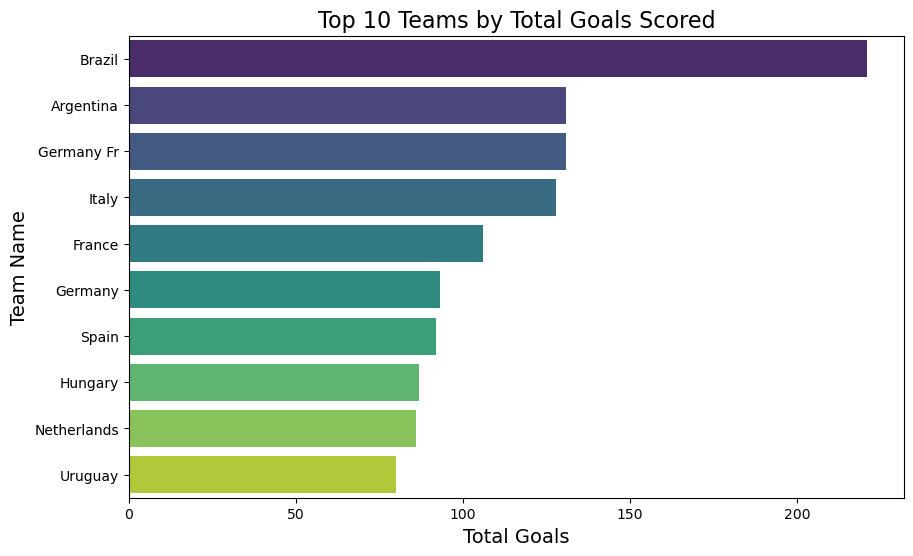

In [34]:
# Get top 10 teams by total goals scored
top_teams = total_goals.sort_values(ascending=False).head(10)

# Plot the top 10 teams with the most goals
plt.figure(figsize=(10, 6))
sns.barplot(x=top_teams.values, y=top_teams.index, palette='viridis')
plt.title('Top 10 Teams by Total Goals Scored', fontsize=16)
plt.xlabel('Total Goals', fontsize=14)
plt.ylabel('Team Name', fontsize=14)
plt.show()


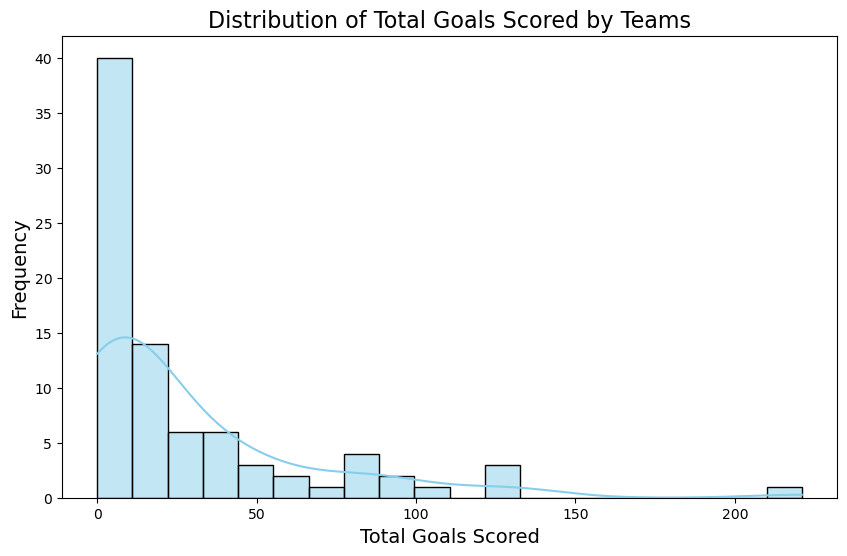

In [35]:
# Plot distribution of total goals scored
plt.figure(figsize=(10, 6))
sns.histplot(total_goals, bins=20, kde=True, color='skyblue')
plt.title('Distribution of Total Goals Scored by Teams', fontsize=16)
plt.xlabel('Total Goals Scored', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()


C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_35116\2735270175.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=home_away_goals.index, y=home_away_goals.values, palette='coolwarm')


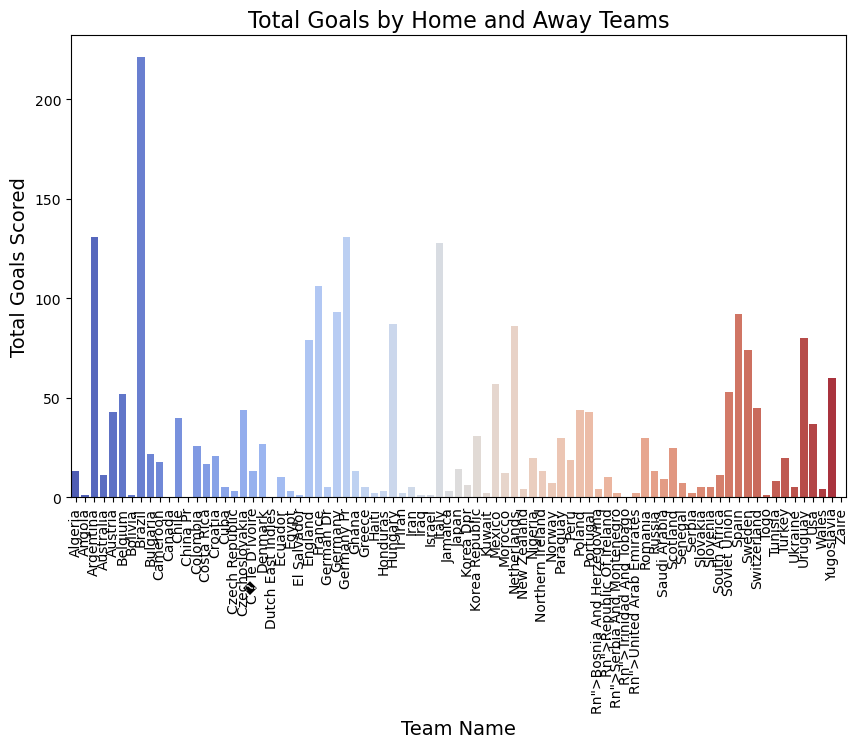

In [36]:
# Group home and away goals
home_goals = matches.groupby('home_team_name')['home_team_goals'].sum()
away_goals = matches.groupby('away_team_name')['away_team_goals'].sum()

# Combine the results
home_away_goals = home_goals.add(away_goals, fill_value=0)

# Plot bar chart for home vs away goals
plt.figure(figsize=(10, 6))
sns.barplot(x=home_away_goals.index, y=home_away_goals.values, palette='coolwarm')
plt.title('Total Goals by Home and Away Teams', fontsize=16)
plt.xlabel('Team Name', fontsize=14)
plt.ylabel('Total Goals Scored', fontsize=14)
plt.xticks(rotation=90)
plt.show()


In [ ]:
----------PLAYERS-----------

In [37]:
# Check the first few rows of the data
print(players.head())

   RoundID  MatchID Team Initials           Coach Name Line-up  Shirt Number  \
0      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
1      201     1096           MEX     LUQUE Juan (MEX)       S             0   
2      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   
3      201     1096           MEX     LUQUE Juan (MEX)       S             0   
4      201     1096           FRA  CAUDRON Raoul (FRA)       S             0   

        Player Name Position Event  
0       Alex THEPOT       GK   NaN  
1   Oscar BONFIGLIO       GK   NaN  
2  Marcel LANGILLER      NaN  G40'  
3      Juan CARRENO      NaN  G70'  
4   Ernest LIBERATI      NaN   NaN  


In [38]:
print(players.columns)

Index(['RoundID', 'MatchID', 'Team Initials', 'Coach Name', 'Line-up',
       'Shirt Number', 'Player Name', 'Position', 'Event'],
      dtype='object')


C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_35116\3021760696.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=players, x='Position', order=position_counts.index, palette='Set2')


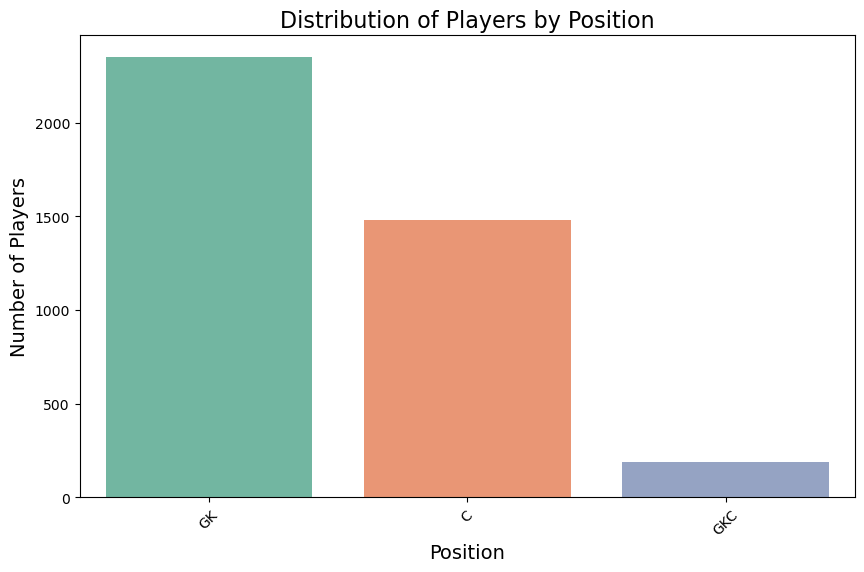

In [45]:
# Count the number of players in each position
position_counts = players['Position'].value_counts()

# Plot the distribution of players by position
plt.figure(figsize=(10, 6))
sns.countplot(data=players, x='Position', order=position_counts.index, palette='Set2')
plt.title('Distribution of Players by Position', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.show()

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_35116\2683489167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette='coolwarm')


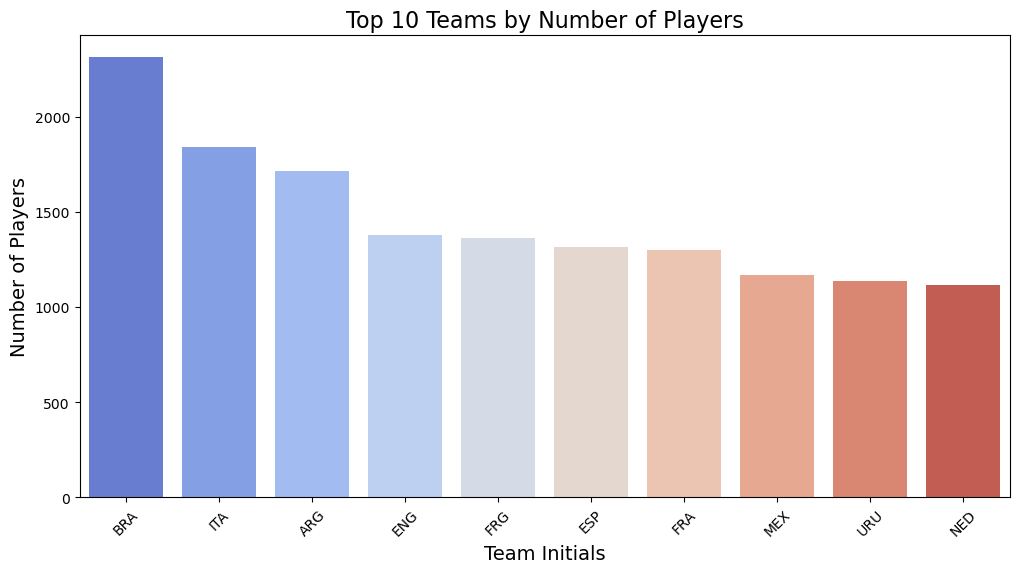

In [47]:
# Get the top 10 teams by number of players
top_10_teams = team_counts.head(10)

# Plot the number of players per team (top 10 teams)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_teams.index, y=top_10_teams.values, palette='coolwarm')
plt.title('Top 10 Teams by Number of Players', fontsize=16)
plt.xlabel('Team Initials', fontsize=14)
plt.ylabel('Number of Players', fontsize=14)
plt.xticks(rotation=45)
plt.show()


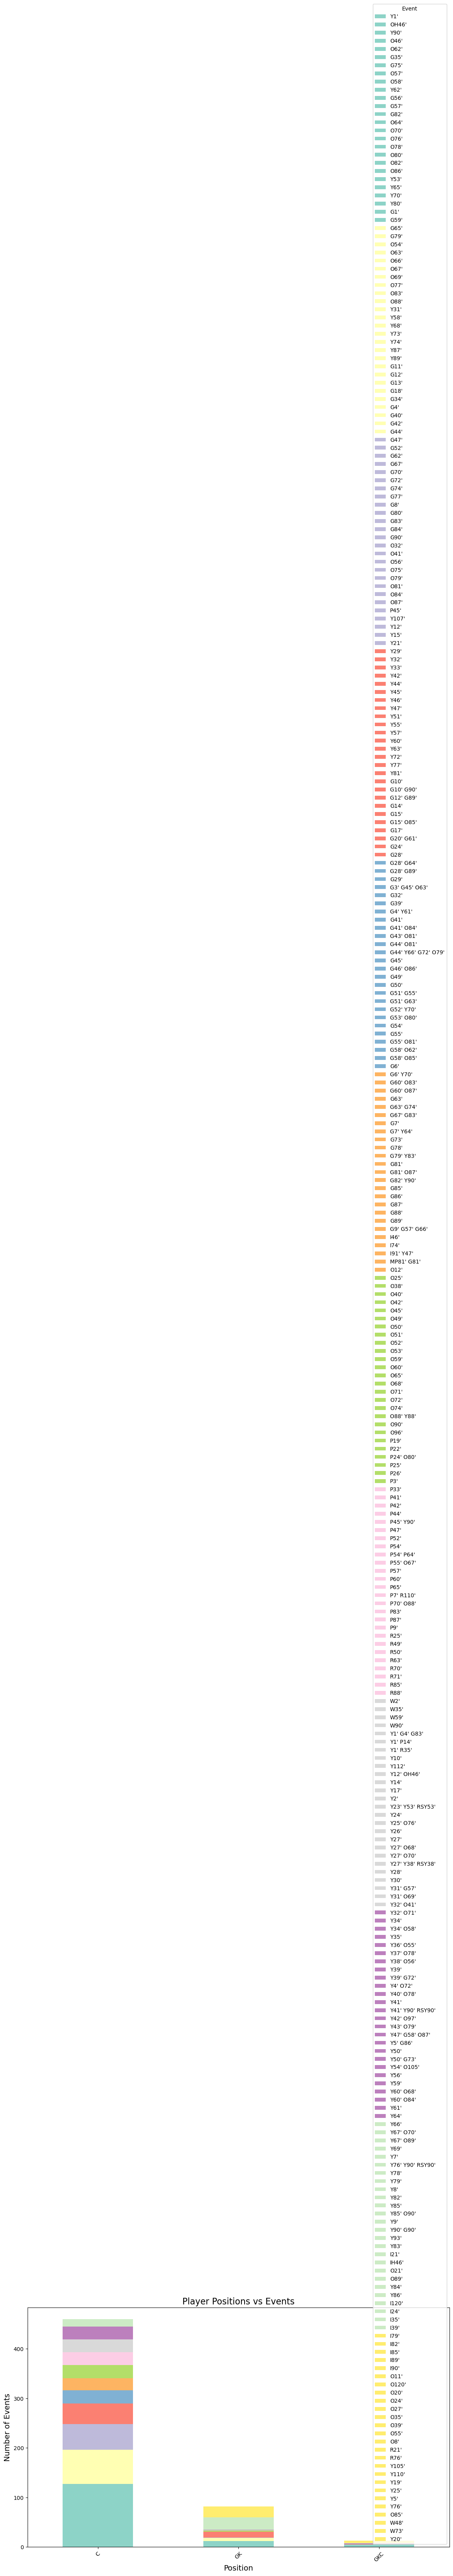

In [48]:
# Count occurrences of events by player position
event_by_position = players.groupby('Position')['Event'].value_counts().unstack().fillna(0)

# Plot the data
event_by_position.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set3')
plt.title('Player Positions vs Events', fontsize=16)
plt.xlabel('Position', fontsize=14)
plt.ylabel('Number of Events', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Event')
plt.show()


In [ ]:
--------------WorldCup------------------

In [25]:
#Lets check the first few rows
print(worldcups.head())

     Year      Country      Winner      Runners-Up    Third      Fourth  \
0  1930.0      Uruguay     Uruguay       Argentina      USA  Yugoslavia   
1  1934.0        Italy       Italy  Czechoslovakia  Germany     Austria   
2  1938.0       France       Italy         Hungary   Brazil      Sweden   
3  1950.0       Brazil     Uruguay          Brazil   Sweden       Spain   
4  1954.0  Switzerland  Germany FR         Hungary  Austria     Uruguay   

   GoalsScored  QualifiedTeams  MatchesPlayed Attendance  
0           70              13             18        591  
1           70              16             17        363  
2           84              15             18        376  
3           88              13             22  1.045.246  
4          140              16             26        769  


In [21]:
# Display the first few rows to understand the structure
print(matches.head())

# Check for missing values in relevant columns
print(matches[['Home Team Name', 'Home Team Goals', 'Away Team Name', 'Away Team Goals']].isnull().sum())

# Fill missing values if necessary (e.g., with 0)
matches['Home Team Goals'].fillna(0, inplace=True)
matches['Away Team Goals'].fillna(0, inplace=True)

# Calculate total goals scored by each country
home_goals = matches.groupby('Home Team Name')['Home Team Goals'].sum()
away_goals = matches.groupby('Away Team Name')['Away Team Goals'].sum()

# Combine home and away goals
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False)

# Display the total goals scored by each country
print(total_goals)

   Year              Datetime    Stage         Stadium         City  \
0  1930  13 Jul 1930 - 15:00   Group 1         Pocitos  Montevideo    
1  1930  13 Jul 1930 - 15:00   Group 4  Parque Central  Montevideo    
2  1930  14 Jul 1930 - 12:45   Group 2  Parque Central  Montevideo    
3  1930  14 Jul 1930 - 14:50   Group 3         Pocitos  Montevideo    
4  1930  15 Jul 1930 - 16:00   Group 1  Parque Central  Montevideo    

  Home Team Name  Home Team Goals  Away Team Goals Away Team Name  \
0         France                4                1         Mexico   
1            USA                3                0        Belgium   
2     Yugoslavia                2                1         Brazil   
3        Romania                3                1           Peru   
4      Argentina                1                0         France   

  Win conditions  ...  Half-time Home Goals  Half-time Away Goals  \
0                 ...                     3                     0   
1                 ..

C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_3912\3704227630.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  matches['Home Team Goals'].fillna(0, inplace=True)
C:\Users\Sunil Kannur\AppData\Local\Temp\ipykernel_3912\3704227630.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [22]:
# Select the top 10 countries by total goals scored
top_10_countries = total_goals.head(10)

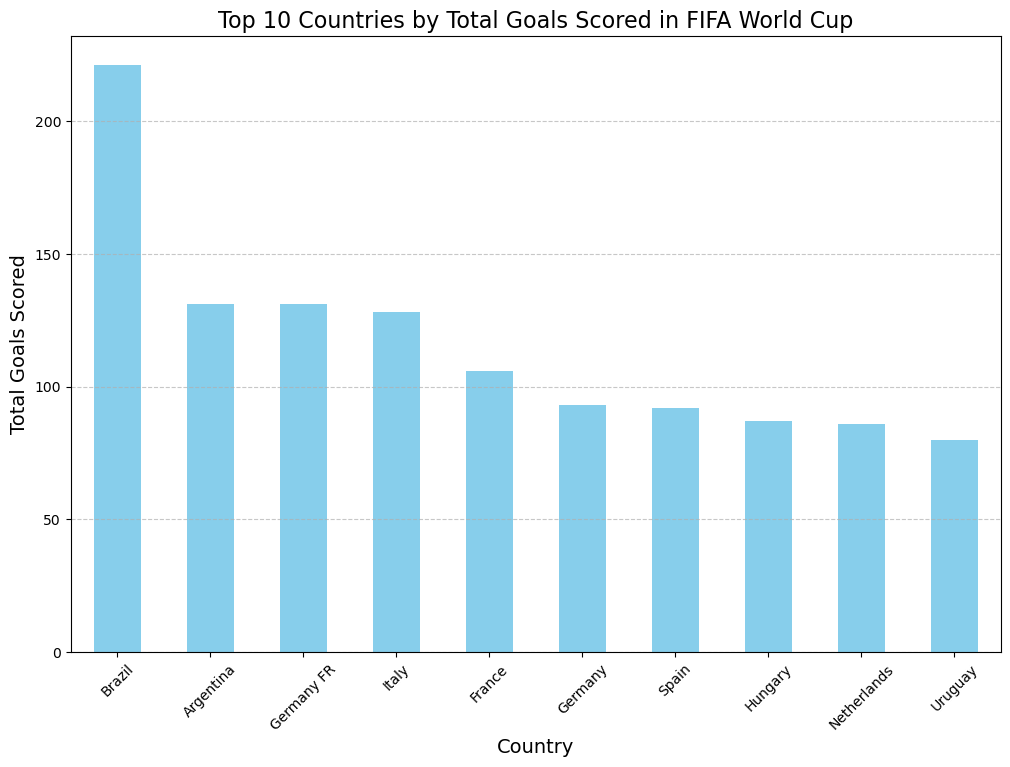

In [23]:
# Plotting
plt.figure(figsize=(12, 8))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Total Goals Scored in FIFA World Cup', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Total Goals Scored', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [26]:
df = pd.read_csv("C:/Users/Sunil Kannur/OneDrive/Desktop/Unified Mentors/UM_Project/FIFA WC data/WorldCups.csv")

In [27]:
#Groups by Winner and sum the Qualified teams
winners_qualified_teams = df.groupby('Winner')['QualifiedTeams'].sum().sort_values(ascending=False)

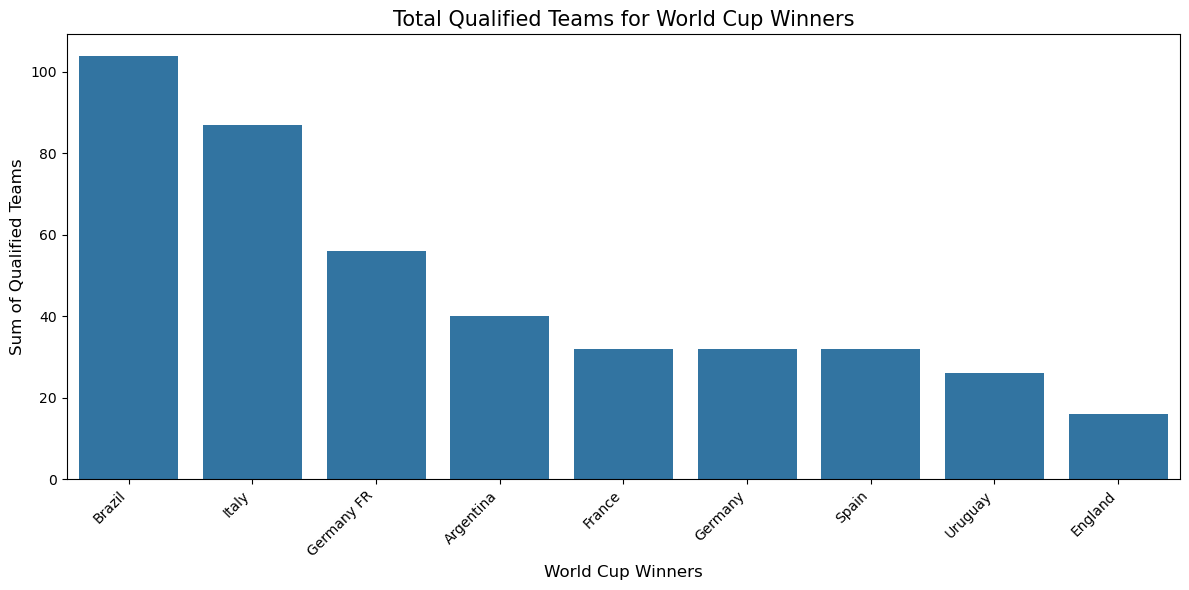

In [28]:
# Create a visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=winners_qualified_teams.index, y=winners_qualified_teams.values)
plt.title('Total Qualified Teams for World Cup Winners', fontsize=15)
plt.xlabel('World Cup Winners', fontsize=12)
plt.ylabel('Sum of Qualified Teams', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

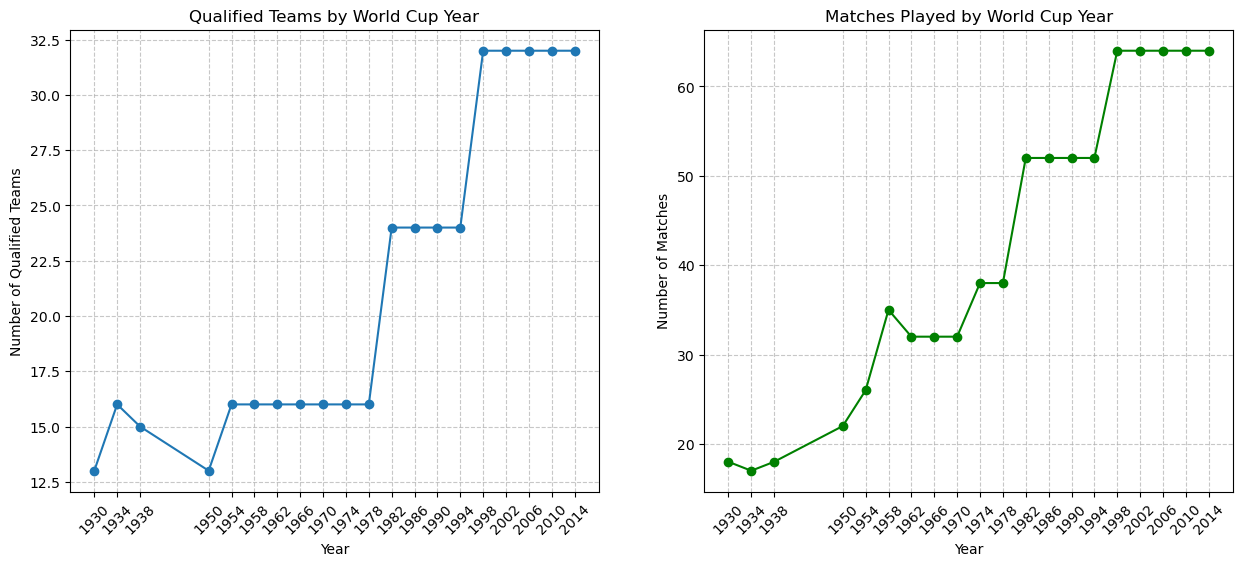

In [34]:
# Create a figure with two subplots
plt.figure(figsize=(15, 6))

# Subplot for Qualified Teams
plt.subplot(1, 2, 1)
plt.plot(df['Year'], df['QualifiedTeams'], marker='o')
plt.title('Qualified Teams by World Cup Year')
plt.xlabel('Year')
plt.ylabel('Number of Qualified Teams')
plt.xticks(df['Year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

# Subplot for Matches Played
plt.subplot(1, 2, 2)
plt.plot(df['Year'], df['MatchesPlayed'], marker='o', color='green')
plt.title('Matches Played by World Cup Year')
plt.xlabel('Year')
plt.ylabel('Number of Matches')
plt.xticks(df['Year'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)

In [35]:
# Print out the data for reference
print("Qualified Teams by Year:")
print(df[['Year', 'QualifiedTeams']].to_string(index=False))
print("\nMatches Played by Year:")
print(df[['Year', 'MatchesPlayed']].to_string(index=False))

Qualified Teams by Year:
 Year  QualifiedTeams
 1930              13
 1934              16
 1938              15
 1950              13
 1954              16
 1958              16
 1962              16
 1966              16
 1970              16
 1974              16
 1978              16
 1982              24
 1986              24
 1990              24
 1994              24
 1998              32
 2002              32
 2006              32
 2010              32
 2014              32

Matches Played by Year:
 Year  MatchesPlayed
 1930             18
 1934             17
 1938             18
 1950             22
 1954             26
 1958             35
 1962             32
 1966             32
 1970             32
 1974             38
 1978             38
 1982             52
 1986             52
 1990             52
 1994             52
 1998             64
 2002             64
 2006             64
 2010             64
 2014             64


In [36]:
#Filter for Italy's World Cups
italy_world_cups = df[df['Winner'] == 'Italy']

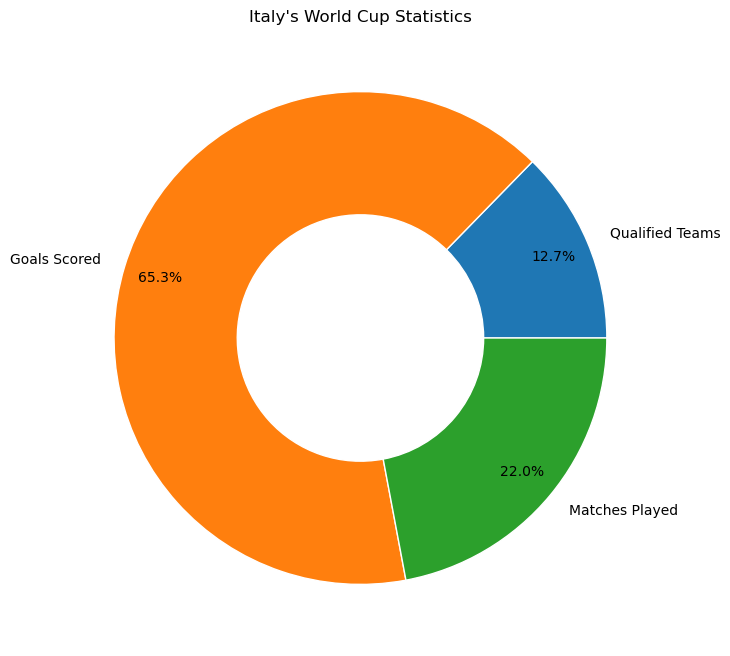

In [38]:
#Create a donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    [italy_world_cups['QualifiedTeams'].sum(), 
     italy_world_cups['GoalsScored'].sum(),
     italy_world_cups['MatchesPlayed'].sum()],
    labels=['Qualified Teams', 'Goals Scored', 'Matches Played'],
    autopct='%1.1f%%',
    pctdistance=0.85,
    wedgeprops=dict(width=0.5, edgecolor='white')
)
plt.title("Italy's World Cup Statistics")
plt.show()

In [39]:
# Print detailed breakdown
print("Italy's World Cup Appearances:")
print(italy_world_cups[['Year', 'QualifiedTeams', 'GoalsScored', 'MatchesPlayed']].to_string(index=False))

Italy's World Cup Appearances:
 Year  QualifiedTeams  GoalsScored  MatchesPlayed
 1934              16           70             17
 1938              15           84             18
 1982              24          146             52
 2006              32          147             64
